In [1]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd
from sklearn import datasets, linear_model  
from sklearn.metrics import mean_squared_error, r2_score  
import seaborn as sns
#load diabetes
diabetes = datasets.load_diabetes() 

#extract data and target
data = pd.DataFrame(diabetes.data)
target=pd.DataFrame(diabetes.target)

data.columns = [diabetes.feature_names]

target= target.rename(columns={0:'T'})

print(target)
data.head(5)

         T
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
..     ...
437  178.0
438  104.0
439  132.0
440  220.0
441   57.0

[442 rows x 1 columns]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [2]:
all= pd.concat([data,target],axis = 1)

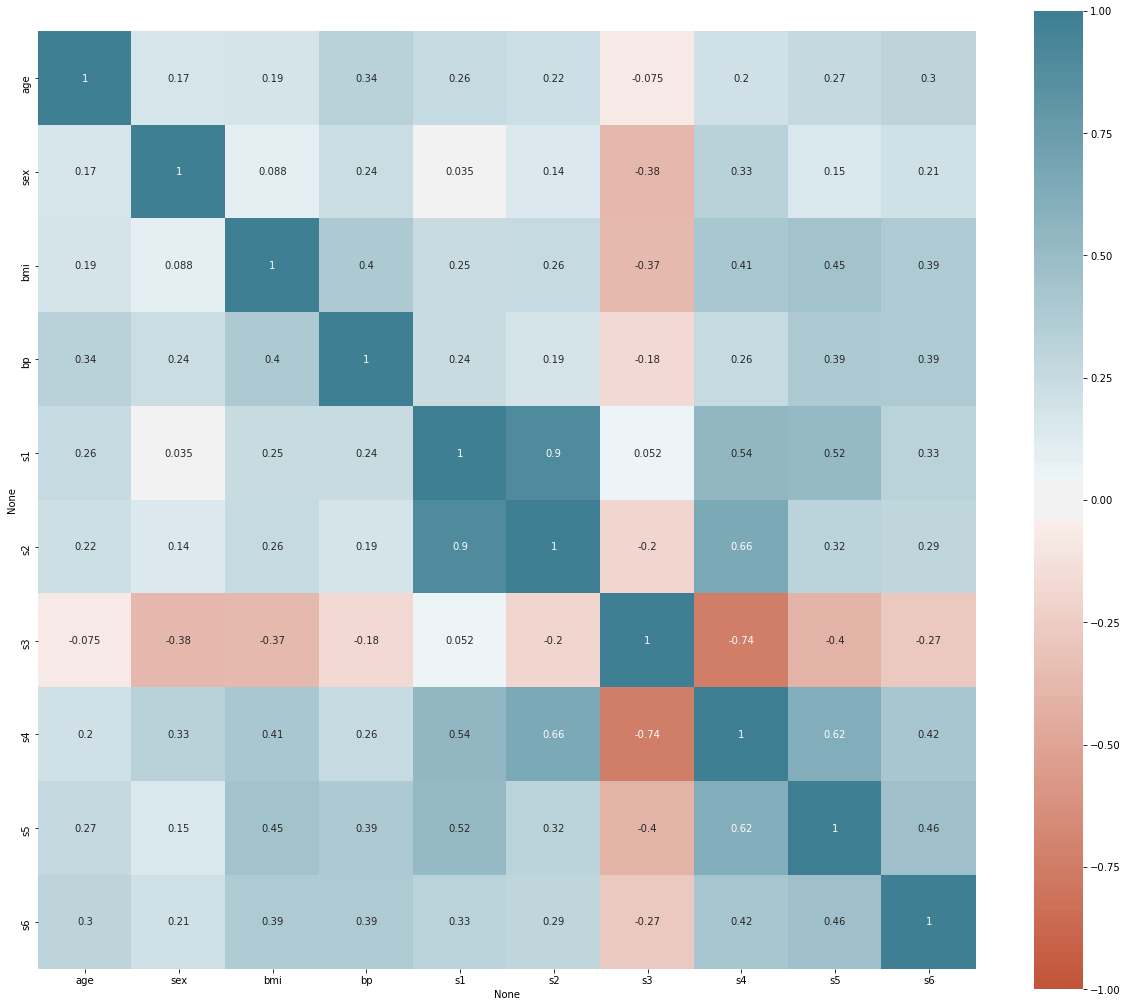

In [3]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(21, 18))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=220), square=True, annot=True)
plt.show()

In [4]:
print('We can see that the most relevant to T is [bmi]，the corralation coef is 0.59')

We can see that the most relevant to T is [bmi]，the corralation coef is 0.59


In [5]:
#pca

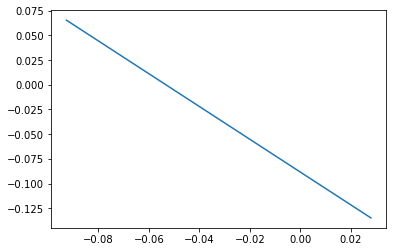

In [6]:
from sklearn.decomposition import PCA as PCA
pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)
plt.plot(X_r[0],X_r[1])
plt.show()


In [7]:
#Import linear_model from sklearn.

In [8]:
from sklearn.model_selection import train_test_split
diabetes_X = diabetes.data[:, np.newaxis,2] 
DataTrain,DataTest,TargetTrain,TargetTest = train_test_split(diabetes_X,target,test_size = 0.6,random_state = 23) 

regr = linear_model.LinearRegression()   
regr.fit(DataTrain,TargetTrain)  
  
y_pred = regr.predict(DataTest) 
y_pred

array([[267.28377437],
       [106.19629605],
       [145.04008515],
       [116.47847552],
       [203.3057688 ],
       [207.87562634],
       [153.03733584],
       [117.6209399 ],
       [206.73316195],
       [198.73591126],
       [108.48122482],
       [110.76615359],
       [193.02358933],
       [ 99.34150974],
       [110.76615359],
       [182.74140986],
       [198.73591126],
       [205.59069757],
       [139.32776322],
       [ 83.34700834],
       [205.59069757],
       [138.18529884],
       [138.18529884],
       [156.464729  ],
       [124.47572621],
       [165.60444408],
       [143.89762076],
       [113.05108236],
       [261.57145244],
       [ 75.34975765],
       [124.47572621],
       [210.16055511],
       [171.31676601],
       [102.76890289],
       [187.3112674 ],
       [213.58794826],
       [ 81.06207957],
       [142.75515638],
       [198.73591126],
       [129.04558375],
       [141.61269199],
       [170.17430162],
       [ 93.62918781],
       [139

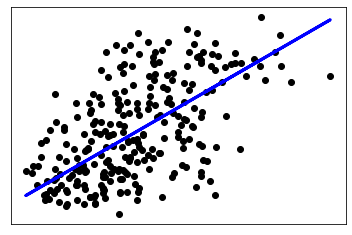

In [9]:
# Plot outputs  
plt.scatter(DataTest, TargetTest, color='black')  
plt.plot(DataTest, y_pred, color='blue', linewidth=3)  
  
plt.xticks(())  
plt.yticks(())  
  
plt.show()  

In [10]:
#MSE

In [11]:
print("Mean squared error: %.2f"  % mean_squared_error(TargetTest,y_pred))  

Mean squared error: 3999.77
